<a href="https://colab.research.google.com/github/stefandanielachirei/P1w1_for_students_old/blob/main/P1w1_for_students_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

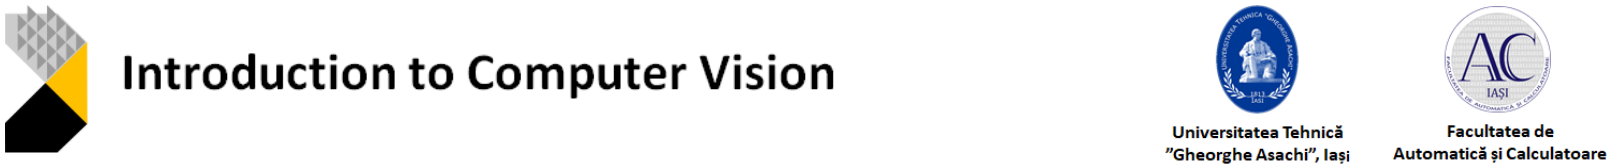

  The 2021 Intro to Computer Vision labs will be run in Google's Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

  Step 1: Make a copy of this notebook to your Drive.(right above of this section: copy to Drive)

  Step 2: Navigate to the "Runtime" tab --> "Change runtime type", under "Hardware accelerator" select "GPU". Go through the notebooks and fill in the **#TODO** cells to get the code to compile for yourself!

# Project 1: Lane Detection

  In the field of Computer Vision, extraction of geometric features from images is a common problem. Different approaches have been proven to be efficient in extracting particular features as part of the solution. Some solutions involve global examination of the input image, while others involve local examination at pixel level. A basic feature of any self-driving system is **Lane Detection.**


## Week 1: edge detection

**Canny edge detector:**
1. This is probably the most widely used edge detector in computer vision
2. Theoretical model: step‐edges corrupted by additive Gaussian noise
3. Canny has shown that the first derivative of the Gaussian closely approximates the operator that optimizes the product of signal‐to‐noise ratio and localization

###Our first Computer Vision pipeline:
1.   Filter image with derivative of Gaussian
```
kernel_size = 9 # Must be an odd number (3, 5, 7...)
smoothed_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
```
2.   Find magnitude and orientation of gradient
3.   Non-maximum suppression
4.   Linking and thresholding (hysteresis): define two thresholds, low and high,
use the high threshold to start edge curves and the low threshold to continue them
```
low_threshold = 180
high_threshold = 240
canny_img = cv2.Canny(smoothed_img, low_threshold, high_threshold)
```

In [ ]:
#TODO: test Canny demo
#go to http://bigwww.epfl.ch/demo/ip/demos/edgeDetector/ and upload image at https://drive.google.com/file/d/1ihgtG3GszspDfkVwmCgts3E-Zjvb7nAi/view?usp=sharing

In [ ]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2

In [ ]:
#TODO: add image at https://drive.google.com/file/d/1ihgtG3GszspDfkVwmCgts3E-Zjvb7nAi/view?usp=sharing to My Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
# check for test image
!ls "/content/drive/My Drive/test.jpeg"

'/content/drive/My Drive/test.jpeg'


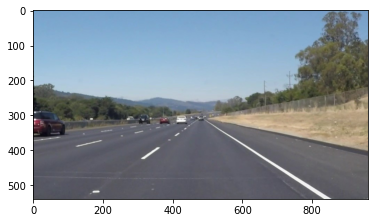

In [ ]:
#TODO: read in test image - see imread from matplotlib.image: https://matplotlib.org/3.1.1/api/image_api.html
#code here

#TODO: print out input image - see plt.imshow from matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
#code here

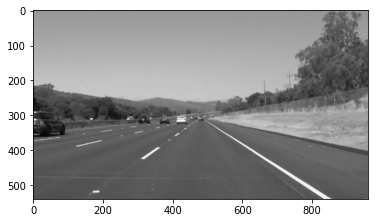

In [ ]:
#TODO: apply the grayscale transform - see cv2.cvtColor (use cv2.COLOR_RGB2GRAY)
"""This will return an image with only one color channel, but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray') you should call plt.imshow(gray, cmap='gray')"""
#code here

#TODO: print grayscale image - you should call plt.imshow(gray, cmap='gray')
#code here

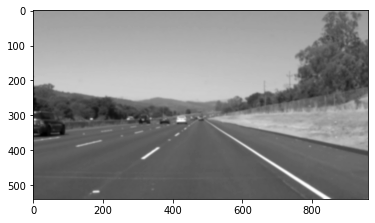

In [ ]:
# Gaussian Smoothing

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 9 # Must be an odd number (3, 5, 7...)

#TODO: apply Gaussian Smoothing - see cv2.GaussianBlur
#code here

#TODO: print smoothed grayscale image - see plt.imshow
#code here

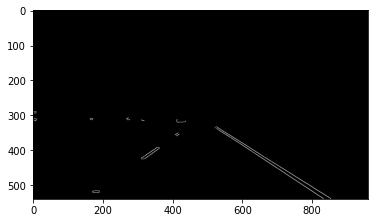

In [ ]:
# Canny Edge Detection

# Define parameters for Canny
low_threshold = 180
high_threshold = 240

#TODO: apply Canny - see cv2.Canny
#code here

#TODO: print Canny edges - see plt.imshow
#code here

###Region of interest:
1.   Define the mask for a lane
* Vertices (trapeze adjusted to image size)
```
rows, cols = image.shape[:2]
bottom_left  = [0, rows*0.95]
top_left     = [cols*0.45, rows*0.55]
bottom_right = [cols, rows]
top_right    = [cols*0.55, rows*0.55]
vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
```
* Mask
```
#defining a blank mask to start with
mask = np.zeros_like(img)
ignore_mask_color = 255
#filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)
```
2.   Masked image
```
masked_image = cv2.bitwise_and(canny_img, mask)
```



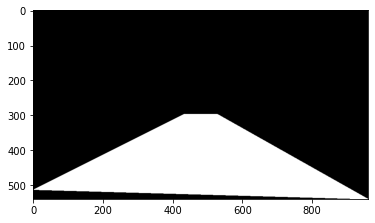

In [ ]:
# Region of Interest

#TODO: define vertices (trapeze adjusted to image size)
#code here

#TODO: create the mask - see cv2.fillPoly
#code here

#TODO: print mask
#code here

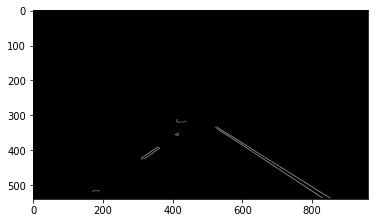

In [ ]:
#TODO: Apply the mask to Canny edges - see cv2.bitwise_and
#code here

#TODO: print masked Canny edges - see plt.imshow
#code here

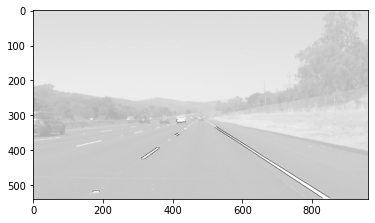

In [ ]:
#overlap grayscale image and edges

#inverse the masked edges (edge in black, everything else white)
edges = cv2.bitwise_not(masked_edges)

#overlap to initial grayscale image
edges_over_gray = cv2.addWeighted(edges, 0.7, gray, 0.3, 0.)

#print overlapped image
plt.imshow(edges_over_gray, cmap='gray')

In [ ]:
#TODO: define the following opperations as functions

# 1. grayscale transform
def grayscale(img):
  #code here
  return gray

# 2. gaussian smoothing
def gaussian_smoothing(img, kernel_size):
  #code here
  return smoothed_img

# 3. Canny edge detection
def canny_detector(img, low_threshold, high_threshold):
  #code here
  return canny_edges

# 4. Region of Interest: define vertices, create the mask (trapeze), apply the mask to Canny edges
def region_of_interest(img):
  #code here
  return masked_edges

# 5. Overlap two images
def overlap(img, a=0.1, img2, b=1, c=0.):
  #code here
  return overlapped

In [ ]:
#our pipeline as a function
def our_pipeline(image):
    
    #Grayscale
    gray_img = grayscale(image)

    #Gaussian Smoothing
    kernel_size = 5 # Must be an odd number (3, 5, 7...)
    smoothed_img = gaussian_smoothing(gray_img, kernel_size)

    #Canny Edge Detection
    #parameters
    low_threshold = 180
    high_threshold = 240
    canny_img = canny_detector(smoothed_img, low_threshold, high_threshold)

    #Masked Image Within a Polygon
    masked_edges = region_of_interest(canny_img)

    #Overlap edges to grayscale
    #params for transparency 
    a = 0.7
    b = 0.3
    c = 0.
    #inverse the masked edges (edge in black, everything else white)
    edges = cv2.bitwise_not(masked_edges)
    overlapped = overlap(edges, a, gray_img, b, c)

    return overlapped

In [ ]:
#TODO: add https://drive.google.com/file/d/1SruGUS--gOwMLBjv3FUiDQW63uY3LWFi/view?usp=sharing to My Drive
#TODO: apply pipeline and print result